<a href="https://colab.research.google.com/github/Sa-Fi/Crop-pest-and-disease-detection/blob/main/Scaling_the_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d safiullah007/leaf-disease


100% 3.76G/3.76G [02:29<00:00, 28.0MB/s]
100% 3.76G/3.76G [02:29<00:00, 27.1MB/s]


In [2]:

# unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/leaf-disease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [4]:
def normalize_image(image):
    image = image.astype(np.float32)
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return image

Normalized Image Pixel Values:
[[[1.         0.99607843 1.        ]
  [0.99607843 0.99215686 1.        ]
  [1.         1.         1.        ]
  ...
  [0.8784314  0.9019608  0.8117647 ]
  [0.84705883 0.85882354 0.77254903]
  [0.8156863  0.83137256 0.73333335]]

 [[0.99215686 0.9882353  0.99607843]
  [0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]
  ...
  [0.9372549  0.95686275 0.8745098 ]
  [0.8745098  0.8980392  0.80784315]
  [0.84313726 0.8666667  0.76862746]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         0.99607843]
  ...
  [0.9529412  0.9882353  0.9098039 ]
  [0.9137255  0.9529412  0.8627451 ]
  [0.8745098  0.9137255  0.8235294 ]]

 ...

 [[0.38039216 0.39607844 0.29803923]
  [0.38039216 0.4        0.29411766]
  [0.37254903 0.39215687 0.28627452]
  ...
  [0.31764707 0.31764707 0.27058825]
  [0.3019608  0.29803923 0.24313726]
  [0.29803923 0.29803923 0.23529412]]

 [[0.42352942 0.4392157  0.3647059 ]
  [0.4

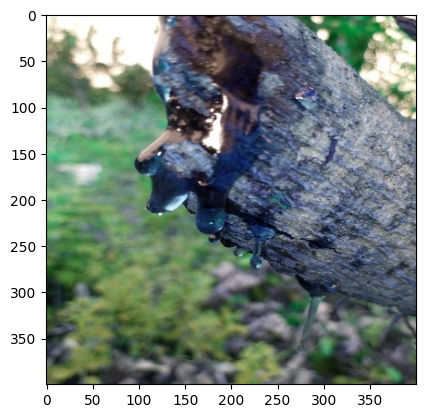

In [ ]:

import cv2
import numpy as np

# Define the path to the input image
input_image_path = '/content/CCMT Dataset/Cashew/gumosis/gumosis103_.jpg'  # Replace with the path to your input image

# Load the input image
image = cv2.imread(input_image_path)

if image is not None:
    # Define the normalization function (scaling to [0, 1])
    def normalize_image(image):
        image = image.astype(np.float32)
        image = (image - np.min(image)) / (np.max(image) - np.min(image))
        return image

    # Perform normalization
    normalized_image = normalize_image(image)

    # Display the normalized image
    plt.imshow(normalized_image)

    # Display pixel values of the normalized image
    print("Normalized Image Pixel Values:")
    print(normalized_image)
else:
    print("Failed to load the input image.")

Normalize the dataset program


In [ ]:
import os
import cv2
from tqdm import tqdm

# Define classes and subclasses
classes = ['Cashew', 'Cassava', 'Maize', 'Tomato']
subclasses = {
    'Cashew': ['anthracnose', 'gumosis', 'healthy', 'leaf miner', 'red rust'],
    'Cassava': ['bacterial blight', 'brown spot', 'green mite', 'healthy', 'mosaic'],
    'Maize': ['fall armyworm', 'grasshoper', 'healthy', 'leaf beetle', 'leaf blight', 'leaf spot', 'streak virus'],
    'Tomato': ['healthy', 'leaf blight', 'leaf curl', 'septoria leaf spot', 'verticulium wilt']
}

# Define the input and output folders
input_root_folder = '/content/CCMT Dataset'
output_root_folder = '/content/drive/MyDrive/CCMT(scaling_dataset)'

# Create the output folder if it doesn't exist
if not os.path.exists(output_root_folder):
    os.makedirs(output_root_folder)

# Create a progress bar
pbar = tqdm(total=len(classes) * len(subclasses))

# Read images, normalize, and save to the output folder
for class_name in classes:
    for subclass_name in subclasses[class_name]:
        input_folder_path = os.path.join(input_root_folder, class_name, subclass_name)
        output_folder_path = os.path.join(output_root_folder, class_name, subclass_name)

        # Create the output folder for the current subclass
        if not os.path.exists(output_folder_path):
            os.makedirs(output_folder_path)

        for filename in os.listdir(input_folder_path):
            image_path = os.path.join(input_folder_path, filename)
            image = cv2.imread(image_path)

            if image is not None:
                # Normalize the image
                normalized_image = normalize_image(image)

                # Save the normalized image to the output folder with the same filename
                output_image_path = os.path.join(output_folder_path, filename)
                cv2.imwrite(output_image_path, (normalized_image).astype(np.float32))
                pbar.update(1)
            else:
                print(f"Skipping file: {image_path}")

pbar.close()

print("Normalization and saving complete.")


15049it [04:07, 65.27it/s]

Skipping file: /content/CCMT Dataset/Maize/healthy/healthy18_.jpg


15071it [04:07, 66.17it/s]

Skipping file: /content/CCMT Dataset/Maize/healthy/healthy88_.jpg


15354it [04:15, 35.59it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle573_.jpg


15513it [04:17, 64.59it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle207_.jpg


15560it [04:18, 68.62it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle208_.jpg


15653it [04:19, 67.95it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle458_.jpg
Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle910_.jpg


15683it [04:19, 66.33it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle90_.jpg


15849it [04:22, 69.79it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle691_.jpg


16063it [04:25, 59.51it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle798_.jpg
Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle690_.jpg
Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle326_.jpg


16168it [04:27, 51.78it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight746_.jpg


16490it [04:33, 59.46it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight913_.jpg


16787it [04:37, 67.46it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight830_.jpg
Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight37_.jpg


16953it [04:40, 54.11it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight590_.jpg


16989it [04:40, 50.97it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight453_.jpg
Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight98_.jpg


17126it [04:43, 57.18it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight667_.jpg


17309it [04:46, 65.31it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot272_.jpg


17413it [04:47, 71.20it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot799_.jpg


17468it [04:48, 67.41it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot64_.jpg


17555it [04:49, 72.32it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot425_.jpg


17852it [04:54, 59.29it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot724_.jpg
Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot958_.jpg


18114it [04:58, 63.84it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot353_.jpg


18314it [05:01, 73.23it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot187_.jpg


18346it [05:02, 71.41it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot497_.jpg


18362it [05:02, 70.67it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot882_.jpg


18580it [05:05, 68.88it/s]

Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus998_.jpg


18612it [05:05, 70.68it/s]

Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus701_.jpg
Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus422_.jpg


18787it [05:08, 64.11it/s]

Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus774_.jpg


18832it [05:09, 52.85it/s]

Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus627_.jpg


19000it [05:12, 54.71it/s]

Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus119_.jpg


19335it [05:17, 71.07it/s]

Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus486_.jpg


19546it [05:20, 64.78it/s]

Skipping file: /content/CCMT Dataset/Tomato/healthy/healthy77_.jpg


19739it [05:22, 78.10it/s]

Skipping file: /content/CCMT Dataset/Tomato/healthy/healthy443_.jpg


20085it [05:30, 31.93it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight645_.jpg


20533it [05:39, 50.18it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight998_.jpg


20599it [05:40, 54.35it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight72_.jpg


20611it [05:40, 54.80it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight471_.jpg


20700it [05:42, 49.53it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight814_.jpg


20767it [05:43, 65.12it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight558_.jpg


20919it [05:45, 72.96it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight1232_.jpg


21205it [05:49, 63.54it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf curl/leaf curl354_.jpg
Skipping file: /content/CCMT Dataset/Tomato/leaf curl/leaf curl43_.jpg


21356it [05:52, 70.03it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf curl/leaf curl186_.jpg


21630it [05:57, 54.45it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf curl/leaf curl271_.jpg


25170it [06:52, 60.96it/s]

Normalization and saving complete.


In [6]:
# Define classes and subclasses
classes = ['Cashew', 'Cassava', 'Maize', 'Tomato']
subclasses = {
    'Cashew': ['anthracnose', 'gumosis', 'healthy', 'leaf miner', 'red rust'],
    'Cassava': ['bacterial blight', 'brown spot', 'green mite', 'healthy', 'mosaic'],
    'Maize': ['fall armyworm', 'grasshopper', 'healthy', 'leaf beetle', 'leaf blight', 'leaf spot', 'streak virus'],
    'Tomato': ['healthy', 'leaf blight', 'leaf curl', 'septoria leaf spot', 'verticulium wilt']
}

data = []  # To store images as arrays
labels = []  # To store labels
progress_bar = tqdm(total=len(classes) * len(subclasses))
main_folder = '/content/Augmented_CCMT data/Augmented_CCMT data'

# Read images and assign labels
for class_name in classes:
    for subclass_name in subclasses[class_name]:
        folder_path = os.path.join(main_folder, class_name, subclass_name)
        for filename in os.listdir(folder_path):
           # if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(folder_path, filename)
                # image = Image.open(image_path)
                image = cv2.imread(image_path)
                if image is not None:
                  image = cv2.resize(image,(150,150))
                  image_array = np.array(image)
                  image_array = normalize_image(image)
                  data.append(image_array)
                  labels.append(class_name + '_' + subclass_name)
                  progress_bar.update(1)
                else:
                  print(f"Skipping file: {image_path}")
progress_bar.close()

# Convert 'data' and 'labels' lists to NumPy arrays
# data = np.array(data)
# labels = np.array(labels)



  0%|          | 0/16 [00:00<?, ?it/s]
27647it [01:26, 319.84it/s]

74it [00:00, 285.09it/s]
112it [00:00, 319.19it/s]
145it [00:00, 320.57it/s]
179it [00:00, 325.22it/s]
215it [00:00, 335.26it/s]
250it [00:00, 339.55it/s]
286it [00:00, 345.51it/s]
321it [00:00, 340.10it/s]
358it [00:01, 348.34it/s]
396it [00:01, 357.01it/s]
433it [00:01, 359.88it/s]
472it [00:01, 367.50it/s]
509it [00:01, 367.60it/s]
547it [00:01, 369.37it/s]
585it [00:01, 370.85it/s]
623it [00:01, 370.20it/s]
661it [00:01, 369.51it/s]
699it [00:01, 371.46it/s]
737it [00:02, 370.40it/s]
775it [00:02, 369.21it/s]
814it [00:02, 373.07it/s]
852it [00:02, 368.90it/s]
891it [00:02, 373.52it/s]
929it [00:02, 372.09it/s]
967it [00:02, 372.30it/s]
1005it [00:02, 373.08it/s]
1043it [00:02, 375.09it/s]
1082it [00:03, 378.21it/s]
1120it [00:03, 372.52it/s]
1158it [00:03, 369.95it/s]
1196it [00:03, 370.48it/s]
1234it [00:03, 370.32it/s]
1272it [00:03, 367.77it/s]
1312it [00:03, 374.67it/s]
1350it [00:03, 373.99it/s]
1388it [00:0

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/healthy/healthy88_.jpg



31214it [01:18, 436.54it/s]
31258it [01:18, 436.24it/s]
31302it [01:18, 434.35it/s]
31346it [01:18, 433.73it/s]
31390it [01:18, 432.66it/s]
31434it [01:19, 432.22it/s]
31480it [01:19, 437.89it/s]
31525it [01:19, 440.46it/s]
31570it [01:19, 443.09it/s]
31615it [01:19, 439.54it/s]
31660it [01:19, 441.84it/s]
31705it [01:19, 440.91it/s]
31750it [01:19, 442.97it/s]
31795it [01:19, 442.56it/s]
31840it [01:19, 444.05it/s]
31885it [01:20, 433.14it/s]
31929it [01:20, 429.80it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/healthy/healthy18_.jpg



31973it [01:20, 430.48it/s]
32019it [01:20, 436.57it/s]
32065it [01:20, 441.52it/s]
32110it [01:20, 440.85it/s]
32155it [01:20, 437.63it/s]
32200it [01:20, 439.98it/s]
32245it [01:20, 440.51it/s]
32290it [01:20, 439.43it/s]
32336it [01:21, 442.93it/s]
32382it [01:21, 446.36it/s]
32427it [01:21, 444.38it/s]
32472it [01:21, 443.84it/s]
32517it [01:21, 445.55it/s]
32562it [01:21, 444.28it/s]
32607it [01:21, 438.97it/s]
32652it [01:21, 439.96it/s]
32697it [01:21, 437.46it/s]
32741it [01:21, 437.30it/s]
32786it [01:22, 439.09it/s]
32830it [01:22, 435.91it/s]
32875it [01:22, 437.35it/s]
32920it [01:22, 438.53it/s]
32966it [01:22, 443.30it/s]
33011it [01:22, 441.72it/s]
33056it [01:22, 435.82it/s]
33100it [01:22, 435.72it/s]
33144it [01:22, 435.92it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle573_.jpg



33188it [01:23, 433.44it/s]
33233it [01:23, 435.47it/s]
33277it [01:23, 434.85it/s]
33321it [01:23, 432.16it/s]
33365it [01:23, 434.22it/s]
33410it [01:23, 436.06it/s]
33455it [01:23, 437.66it/s]
33499it [01:23, 435.91it/s]
33543it [01:23, 433.01it/s]
33587it [01:23, 430.33it/s]
33631it [01:24, 427.90it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle326_.jpg



33676it [01:24, 432.31it/s]
33720it [01:24, 432.61it/s]
33765it [01:24, 436.22it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle458_.jpg



33811it [01:24, 441.88it/s]
33857it [01:24, 445.36it/s]
33902it [01:24, 443.88it/s]
33947it [01:24, 441.14it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle690_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle208_.jpg



33992it [01:24, 438.18it/s]
34036it [01:24, 438.14it/s]
34081it [01:25, 439.03it/s]
34126it [01:25, 439.62it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle207_.jpg



34170it [01:25, 436.78it/s]
34214it [01:25, 435.17it/s]
34260it [01:25, 440.64it/s]
34306it [01:25, 444.43it/s]
34351it [01:25, 444.26it/s]
34396it [01:25, 440.82it/s]
34441it [01:25, 438.51it/s]
34485it [01:25, 438.83it/s]
34529it [01:26, 438.27it/s]
34573it [01:26, 435.14it/s]
34617it [01:26, 434.36it/s]
34662it [01:26, 438.34it/s]
34706it [01:26, 436.71it/s]
34751it [01:26, 439.94it/s]
34797it [01:26, 443.89it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle910_.jpg



34843it [01:26, 447.67it/s]
34889it [01:26, 449.81it/s]
34935it [01:26, 451.59it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle798_.jpg



34981it [01:27, 449.97it/s]
35027it [01:27, 452.49it/s]
35073it [01:27, 449.99it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle691_.jpg



35119it [01:27, 437.96it/s]
35163it [01:27, 436.95it/s]
35207it [01:27, 424.83it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle90_.jpg



35250it [01:27, 411.77it/s]
35292it [01:27, 408.49it/s]
35333it [01:27, 405.22it/s]
35374it [01:28, 402.01it/s]
35415it [01:28, 402.95it/s]
35456it [01:28, 399.95it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight37_.jpg



35497it [01:28, 401.47it/s]
35538it [01:28, 394.97it/s]
35578it [01:28, 377.63it/s]
35617it [01:28, 378.89it/s]
35656it [01:28, 381.74it/s]
35697it [01:28, 389.72it/s]
35737it [01:28, 377.81it/s]
35777it [01:29, 383.70it/s]
35818it [01:29, 390.29it/s]
35858it [01:29, 390.78it/s]
35898it [01:29, 388.86it/s]
35938it [01:29, 389.63it/s]
35978it [01:29, 391.12it/s]
36018it [01:29, 388.85it/s]
36057it [01:29, 386.07it/s]
36097it [01:29, 389.20it/s]
36137it [01:30, 392.11it/s]
36178it [01:30, 394.50it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight746_.jpg



36218it [01:30, 392.91it/s]
36258it [01:30, 386.88it/s]
36299it [01:30, 390.65it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight453_.jpg



36340it [01:30, 395.95it/s]
36380it [01:30, 392.93it/s]
36420it [01:30, 394.13it/s]
36461it [01:30, 396.45it/s]
36503it [01:30, 401.58it/s]
36545it [01:31, 405.98it/s]
36586it [01:31, 405.44it/s]
36627it [01:31, 402.07it/s]
36668it [01:31, 401.16it/s]
36710it [01:31, 404.73it/s]
36751it [01:31, 406.10it/s]
36792it [01:31, 403.36it/s]
36834it [01:31, 406.19it/s]
36875it [01:31, 404.94it/s]
36916it [01:31, 404.69it/s]
36957it [01:32, 402.00it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight913_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight590_.jpg



36998it [01:32, 402.01it/s]
37039it [01:32, 404.06it/s]
37080it [01:32, 403.95it/s]
37121it [01:32, 402.08it/s]
37162it [01:32, 398.49it/s]
37204it [01:32, 402.31it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight98_.jpg



37245it [01:32, 399.72it/s]
37285it [01:32, 399.58it/s]
37325it [01:32, 399.31it/s]
37365it [01:33, 396.92it/s]
37405it [01:33, 397.15it/s]
37445it [01:33, 393.85it/s]
37485it [01:33, 391.72it/s]
37525it [01:33, 391.92it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight830_.jpg



37566it [01:33, 395.91it/s]
37606it [01:33, 395.17it/s]
37646it [01:33, 387.71it/s]
37685it [01:33, 381.80it/s]
37724it [01:34, 371.92it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight667_.jpg



37763it [01:34, 375.29it/s]
37802it [01:34, 379.48it/s]
37841it [01:34, 378.29it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot882_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot958_.jpg



37879it [01:34, 372.48it/s]
37919it [01:34, 377.84it/s]
37957it [01:34, 377.58it/s]
37996it [01:34, 381.11it/s]
38035it [01:34, 381.96it/s]
38074it [01:34, 381.02it/s]
38113it [01:35, 379.60it/s]
38153it [01:35, 383.08it/s]
38193it [01:35, 385.43it/s]
38232it [01:35, 382.37it/s]
38272it [01:35, 386.27it/s]
38312it [01:35, 388.60it/s]
38352it [01:35, 390.69it/s]
38392it [01:35, 390.10it/s]
38433it [01:35, 395.72it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot497_.jpg



38473it [01:35, 392.00it/s]
38513it [01:36, 392.70it/s]
38553it [01:36, 391.20it/s]
38593it [01:36, 389.29it/s]
38634it [01:36, 392.85it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot724_.jpg



38676it [01:36, 398.39it/s]
38716it [01:36, 392.87it/s]
38756it [01:36, 394.02it/s]
38796it [01:36, 392.13it/s]
38836it [01:36, 390.98it/s]
38876it [01:36, 388.74it/s]
38916it [01:37, 389.66it/s]
38956it [01:37, 391.26it/s]
38996it [01:37, 384.27it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot187_.jpg



39035it [01:37, 382.39it/s]
39077it [01:37, 391.31it/s]
39117it [01:37, 392.35it/s]
39157it [01:37, 390.60it/s]
39198it [01:37, 394.72it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot64_.jpg



39238it [01:37, 390.72it/s]
39278it [01:38, 387.90it/s]
39317it [01:38, 385.13it/s]
39357it [01:38, 387.66it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot425_.jpg



39397it [01:38, 388.06it/s]
39437it [01:38, 389.97it/s]
39477it [01:38, 391.85it/s]
39517it [01:38, 388.90it/s]
39558it [01:38, 393.77it/s]
39598it [01:38, 387.87it/s]
39637it [01:38, 386.53it/s]
39677it [01:39, 389.12it/s]
39717it [01:39, 390.12it/s]
39757it [01:39, 390.40it/s]
39797it [01:39, 388.06it/s]
39836it [01:39, 388.28it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot353_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot799_.jpg



39877it [01:39, 393.64it/s]
39917it [01:39, 391.90it/s]
39957it [01:39, 390.81it/s]
39997it [01:39, 388.45it/s]
40036it [01:39, 386.21it/s]
40075it [01:40, 382.74it/s]
40114it [01:40, 377.63it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot272_.jpg



40152it [01:40, 376.02it/s]
40190it [01:40, 374.50it/s]
40228it [01:40, 367.38it/s]
40265it [01:40, 358.40it/s]
40301it [01:40, 355.81it/s]
40337it [01:40, 353.44it/s]
40373it [01:40, 354.87it/s]
40409it [01:41, 350.26it/s]
40448it [01:41, 359.08it/s]
40485it [01:41, 361.41it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus119_.jpg



40522it [01:41, 351.65it/s]
40560it [01:41, 358.09it/s]
40596it [01:41, 355.54it/s]
40634it [01:41, 360.31it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus486_.jpg



40672it [01:41, 366.07it/s]
40710it [01:41, 369.46it/s]
40748it [01:41, 371.03it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus774_.jpg



40787it [01:42, 373.99it/s]
40827it [01:42, 380.54it/s]
40866it [01:42, 382.20it/s]
40907it [01:42, 388.13it/s]
40947it [01:42, 390.94it/s]
40987it [01:42, 393.05it/s]
41027it [01:42, 392.27it/s]
41067it [01:42, 391.95it/s]
41107it [01:42, 390.45it/s]
41147it [01:42, 390.88it/s]
41187it [01:43, 390.04it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus627_.jpg



41227it [01:43, 390.53it/s]
41267it [01:43, 391.62it/s]
41307it [01:43, 384.96it/s]
41347it [01:43, 389.28it/s]
41386it [01:43, 387.71it/s]
41425it [01:43, 388.21it/s]
41466it [01:43, 391.86it/s]
41506it [01:43, 392.58it/s]
41546it [01:43, 389.14it/s]
41585it [01:44, 386.86it/s]
41624it [01:44, 380.86it/s]
41663it [01:44, 380.17it/s]
41703it [01:44, 384.35it/s]
41742it [01:44, 383.97it/s]
41782it [01:44, 386.64it/s]
41821it [01:44, 387.20it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus701_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus998_.jpg



41860it [01:44, 382.19it/s]
41899it [01:44, 374.16it/s]
41939it [01:45, 380.78it/s]
41979it [01:45, 385.51it/s]
42018it [01:45, 383.35it/s]
42058it [01:45, 386.45it/s]
42099it [01:45, 392.96it/s]
42139it [01:45, 394.80it/s]
42179it [01:45, 389.61it/s]
42218it [01:45, 386.75it/s]
42258it [01:45, 387.92it/s]
42297it [01:45, 383.34it/s]
42336it [01:46, 375.33it/s]
42377it [01:46, 384.47it/s]
42416it [01:46, 383.54it/s]
42455it [01:46, 384.71it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus422_.jpg



42496it [01:46, 390.45it/s]
42536it [01:46, 387.66it/s]
42576it [01:46, 390.30it/s]
42618it [01:46, 396.91it/s]
42659it [01:46, 397.94it/s]
42701it [01:46, 404.25it/s]
42746it [01:47, 417.21it/s]
42790it [01:47, 421.94it/s]
42834it [01:47, 426.12it/s]
42877it [01:47, 426.97it/s]
42921it [01:47, 428.35it/s]
42964it [01:47, 428.64it/s]
43008it [01:47, 429.82it/s]
43052it [01:47, 432.23it/s]
43097it [01:47, 437.22it/s]
43141it [01:47, 436.76it/s]
43185it [01:48, 426.68it/s]
43228it [01:48, 425.44it/s]
43274it [01:48, 433.95it/s]
43318it [01:48, 432.91it/s]
43362it [01:48, 431.42it/s]
43406it [01:48, 429.28it/s]
43449it [01:48, 426.27it/s]
43492it [01:48, 423.45it/s]
43535it [01:48, 424.76it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/healthy/healthy443_.jpg



43580it [01:48, 429.72it/s]
43624it [01:49, 431.31it/s]
43668it [01:49, 431.61it/s]
43712it [01:49, 429.31it/s]
43755it [01:49, 428.27it/s]
43800it [01:49, 432.70it/s]
43844it [01:49, 433.97it/s]
43888it [01:49, 430.94it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/healthy/healthy77_.jpg



43932it [01:49, 432.90it/s]
43977it [01:49, 436.28it/s]
44021it [01:50, 434.05it/s]
44066it [01:50, 438.03it/s]
44111it [01:50, 441.36it/s]
44156it [01:50, 439.17it/s]
44200it [01:50, 433.13it/s]
44245it [01:50, 437.95it/s]
44291it [01:50, 442.10it/s]
44336it [01:50, 442.56it/s]
44381it [01:50, 437.91it/s]
44425it [01:50, 436.83it/s]
44470it [01:51, 438.93it/s]
44515it [01:51, 441.37it/s]
44560it [01:51, 442.24it/s]
44605it [01:51, 433.04it/s]
44649it [01:51, 425.98it/s]
44692it [01:51, 422.73it/s]
44735it [01:51, 413.71it/s]
44777it [01:51, 408.81it/s]
44818it [01:51, 403.06it/s]
44859it [01:51, 395.91it/s]
44899it [01:52, 393.24it/s]
44939it [01:52, 393.77it/s]
44979it [01:52, 391.68it/s]
45020it [01:52, 394.02it/s]
45061it [01:52, 398.15it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight645_.jpg



45101it [01:52, 397.92it/s]
45141it [01:52, 397.18it/s]
45182it [01:52, 398.52it/s]
45223it [01:52, 398.90it/s]
45264it [01:53, 401.67it/s]
45305it [01:53, 389.82it/s]
45345it [01:53, 391.49it/s]
45385it [01:53, 390.48it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight72_.jpg



45425it [01:53, 390.69it/s]
45466it [01:53, 394.78it/s]
45506it [01:53, 390.62it/s]
45547it [01:53, 395.05it/s]
45588it [01:53, 397.40it/s]
45629it [01:53, 399.86it/s]
45670it [01:54, 394.12it/s]
45710it [01:54, 389.93it/s]
45750it [01:54, 389.40it/s]
45789it [01:54, 386.87it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight814_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight998_.jpg



45828it [01:54, 386.41it/s]
45869it [01:54, 391.64it/s]
45912it [01:54, 400.86it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight471_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight558_.jpg



45954it [01:54, 404.91it/s]
45995it [01:54, 405.60it/s]
46036it [01:54, 405.12it/s]
46077it [01:55, 402.22it/s]
46118it [01:55, 401.89it/s]
46159it [01:55, 400.88it/s]
46200it [01:55, 403.18it/s]
46241it [01:55, 403.02it/s]
46282it [01:55, 404.61it/s]
46323it [01:55, 405.89it/s]
46365it [01:55, 409.71it/s]
46406it [01:55, 405.33it/s]
46447it [01:55, 405.35it/s]
46488it [01:56, 399.43it/s]
46529it [01:56, 400.26it/s]
46570it [01:56, 398.67it/s]
46610it [01:56, 397.82it/s]
46652it [01:56, 401.81it/s]
46693it [01:56, 403.20it/s]
46734it [01:56, 403.97it/s]
46775it [01:56, 403.16it/s]
46817it [01:56, 405.97it/s]
46858it [01:57, 402.68it/s]
46900it [01:57, 404.70it/s]
46941it [01:57, 404.13it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight1232_.jpg



46982it [01:57, 395.14it/s]
47024it [01:57, 401.70it/s]
47065it [01:57, 402.30it/s]
47106it [01:57, 403.09it/s]
47147it [01:57, 396.22it/s]
47187it [01:57, 395.67it/s]
47230it [01:57, 403.55it/s]
47275it [01:58, 416.03it/s]
47320it [01:58, 423.65it/s]
47364it [01:58, 427.70it/s]
47408it [01:58, 430.09it/s]
47453it [01:58, 435.52it/s]
47497it [01:58, 424.55it/s]
47540it [01:58, 425.40it/s]
47584it [01:58, 428.52it/s]
47628it [01:58, 430.44it/s]
47672it [01:58, 433.12it/s]
47716it [01:59, 431.83it/s]
47760it [01:59, 433.34it/s]
47804it [01:59, 433.10it/s]
47851it [01:59, 441.58it/s]
47896it [01:59, 436.41it/s]
47941it [01:59, 438.53it/s]
47985it [01:59, 438.92it/s]
48029it [01:59, 436.75it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf curl/leaf curl186_.jpg



48073it [01:59, 435.39it/s]
48117it [01:59, 431.26it/s]
48162it [02:00, 434.32it/s]
48208it [02:00, 440.79it/s]
48253it [02:00, 443.38it/s]
48298it [02:00, 435.96it/s]
48342it [02:00, 435.58it/s]
48386it [02:00, 435.24it/s]
48430it [02:00, 431.70it/s]
48474it [02:00, 433.12it/s]
48518it [02:00, 430.26it/s]
48562it [02:00, 426.91it/s]
48605it [02:01, 426.17it/s]
48648it [02:01, 426.35it/s]
48691it [02:01, 424.71it/s]
48734it [02:01, 425.80it/s]
48779it [02:01, 431.55it/s]
48823it [02:01, 428.87it/s]
48867it [02:01, 432.12it/s]
48912it [02:01, 434.59it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf curl/leaf curl354_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf curl/leaf curl43_.jpg



48956it [02:01, 431.57it/s]
49000it [02:02, 430.56it/s]
49044it [02:02, 432.27it/s]
49088it [02:02, 434.03it/s]
49132it [02:02, 433.19it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf curl/leaf curl271_.jpg



49176it [02:02, 434.84it/s]
49222it [02:02, 441.84it/s]
49267it [02:02, 438.01it/s]
49311it [02:02, 436.90it/s]
49355it [02:02, 428.20it/s]
49398it [02:02, 409.98it/s]
49440it [02:03, 392.39it/s]
49480it [02:03, 383.34it/s]
49519it [02:03, 377.80it/s]
49557it [02:03, 374.14it/s]
49595it [02:03, 373.77it/s]
49633it [02:03, 372.76it/s]
49671it [02:03, 371.44it/s]
49709it [02:03, 370.29it/s]
49747it [02:03, 363.48it/s]
49784it [02:04, 362.77it/s]
49821it [02:04, 362.66it/s]
49858it [02:04, 362.61it/s]
49895it [02:04, 363.92it/s]
49932it [02:04, 362.51it/s]
49969it [02:04, 361.99it/s]
50006it [02:04, 356.49it/s]
50042it [02:04, 350.75it/s]
50078it [02:04, 352.99it/s]
50115it [02:04, 356.02it/s]
50151it [02:05, 356.50it/s]
50187it [02:05, 354.15it/s]
50223it [02:05, 351.40it/s]
50259it [02:05, 350.03it/s]
50295it [02:05, 351.39it/s]
50331it [02:05, 351.87it/s]
50367it [02:05, 349.32it/s]
50402it [02:05, 349.49it/s]
50439it [02:05, 352.97it/s]
50475it [02:05, 352.12it/s]
50511it [02:06, 341

In [7]:
data[0]

array([[[0.9506726 , 0.9865471 , 0.9551569 ],
        [0.9551569 , 0.9910314 , 0.9596413 ],
        [0.94170403, 0.9910314 , 0.9551569 ],
        ...,
        [0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9551569 , 0.9955157 , 0.9506726 ]],

       [[0.9596413 , 1.        , 0.9551569 ],
        [0.9506726 , 0.9910314 , 0.9506726 ],
        [0.94170403, 0.9910314 , 0.9551569 ],
        ...,
        [0.9551569 , 0.9910314 , 0.94618833],
        [0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9551569 , 0.9955157 , 0.9506726 ]],

       [[0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9596413 , 1.        , 0.9551569 ],
        [0.93721974, 0.9865471 , 0.9506726 ],
        ...,
        [0.9641256 , 1.        , 0.9506726 ],
        [0.9551569 , 0.9910314 , 0.94618833],
        [0.9596413 , 0.9955157 , 0.9506726 ]],

       ...,

       [[0.75336325, 0.79820627, 0.7443946 ],
        [0.75784755, 0.80269057, 0.7488789 ],
        [0.75336325, 0

In [8]:
labels[0]

'Cashew_anthracnose'

Text(0.5, 1.0, 'Cashew_anthracnose')

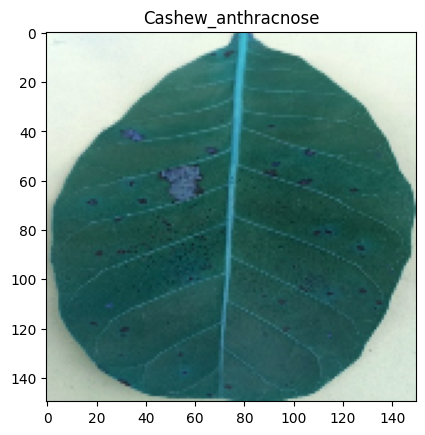

In [10]:
plt.imshow(data[0])
plt.title(labels[0])

In [11]:
import numpy as np

# Save data and labels to disk
np.save('/content/drive/MyDrive/data store/scaling data/data_scaling.npy', data)
np.save('/content/drive/MyDrive/data store/scaling data/labels_scaling.npy', labels)

In [12]:
len(data)

54602

In [13]:
data[0]

array([[[0.9506726 , 0.9865471 , 0.9551569 ],
        [0.9551569 , 0.9910314 , 0.9596413 ],
        [0.94170403, 0.9910314 , 0.9551569 ],
        ...,
        [0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9551569 , 0.9955157 , 0.9506726 ]],

       [[0.9596413 , 1.        , 0.9551569 ],
        [0.9506726 , 0.9910314 , 0.9506726 ],
        [0.94170403, 0.9910314 , 0.9551569 ],
        ...,
        [0.9551569 , 0.9910314 , 0.94618833],
        [0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9551569 , 0.9955157 , 0.9506726 ]],

       [[0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9596413 , 1.        , 0.9551569 ],
        [0.93721974, 0.9865471 , 0.9506726 ],
        ...,
        [0.9641256 , 1.        , 0.9506726 ],
        [0.9551569 , 0.9910314 , 0.94618833],
        [0.9596413 , 0.9955157 , 0.9506726 ]],

       ...,

       [[0.75336325, 0.79820627, 0.7443946 ],
        [0.75784755, 0.80269057, 0.7488789 ],
        [0.75336325, 0

Text(0.5, 1.0, 'Cashew_anthracnose')

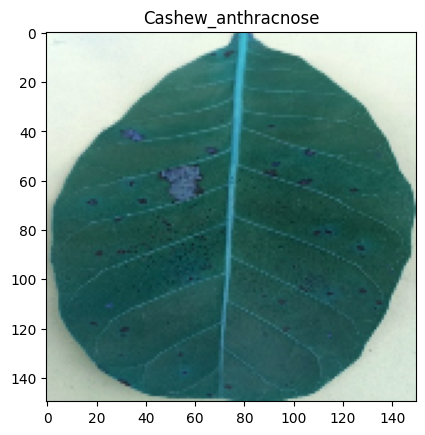

In [14]:
plt.imshow(data[0])
plt.title(labels[0])